In [1]:
import sys
import os
import numpy as np
sys.path.insert(0, r'D:\uni\Masterarbeit\Code\auswertung')
import auswertung_ma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
p = r"D:\Uni\Masterarbeit\Daten\Tree_billig"

# Schaue erstmal, ob die erzeugte Anzahl an Edges mit meinen theoretischen Erwartungen übereinstimmt:

In [6]:
n, c = 40, 3
p1 = r'D:\Uni\Masterarbeit\Daten\LP_Approx_skalierung\TreeTest_C_40_nodes_5_scenarios\TreePlusC_3.000000_c_40_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000\simulation_0'
print(auswertung_ma.read_mean_edge_number(p1))
print(auswertung_ma.calc_expected_m(n, c))
n, c = 60, 4
p2 = r'D:\Uni\Masterarbeit\Daten\LP_Approx_skalierung\TreeTest_C4_60_nodes_5_scenarios\TreePlusC_4.000000_c_60_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000\simulation_0'
print(auswertung_ma.read_mean_edge_number(p2))
print(auswertung_ma.calc_expected_m(n, c))
n, c = 80, 4
p2 = r'D:\Uni\Masterarbeit\Daten\LP_Approx_skalierung\TreeTest_C4_80_nodes_5_scenarios\TreePlusC_4.000000_c_80_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000\simulation_0'
print(auswertung_ma.read_mean_edge_number(p2))
print(auswertung_ma.calc_expected_m(n, c))
n, c = 100, 2
p2 = r'D:\Uni\Masterarbeit\Daten\Tree_billig\TreeTest_LP3_100_nodes_5_scenarios\TreePlusP_0.000000_p_100_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000\simulation_0'
print(auswertung_ma.read_mean_edge_number(p2))
print(auswertung_ma.calc_expected_m(n, c))

58.81
58.5
119.18
118.0
156.29
158.0
99.0
99.0


Das sieht ganz ok aus.

# Laufzeitanalyse
Analysiere Laufzeitverhalten vom LP-Alg für Trees wo die 1. stage Kosten jeder Kante immer billiger sind als alle 2. stage Kosten und zwar erstmal in jedem Szenario (nicht nur im Mittel)

In [3]:
# exponentieller Fit:
def f_exp(x, a, b):
    return a * np.exp(b *x)

# polynomialer Fit:
def f_poly(x, a, b):
    return a * (x ** b)

def f_poly_x(x, b):
    return x ** b

In [4]:
tb_dic = {}

dirs_tree_billig = [d for d in os.listdir(p) if 'TreeTest_LP_' in d]

for ho in dirs_tree_billig:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p, ho, os.listdir(os.path.join(p,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    
    tb_dic[number_nodes] = df.mean()

100
10
20
30
40
50
5
60
70
80
90


In [5]:
ns_b = sorted(list(tb_dic.keys()))
mean_lp_constrs_b = [tb_dic[n].lp_constraint_counter for n in ns_b]
mean_total_lp_b = [tb_dic[n]['total_lp[s]'] for n in ns_b]
mean_sum_opt_b = [tb_dic[n]['sum_opt[s]'] for n in ns_b]
mean_anteil_opt_b = [tb_dic[n]['anteil_opt'] for n in ns_b]

In [25]:
# lese noch die Daten vom mod. LP-Approx ein
t_mod = {}

for ho in os.listdir(r'D:\Uni\Masterarbeit\Daten\ModifizierterLP'):
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(r'D:\Uni\Masterarbeit\Daten\ModifizierterLP', ho, os.listdir(os.path.join(r'D:\Uni\Masterarbeit\Daten\ModifizierterLP',ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    
    t_mod[number_nodes] = df.mean()

100
10
20
30
40
50
60
70
80


In [26]:
ns_mod = sorted(list(t_mod.keys()))
mean_lp_constrs_mod = [t_mod[n].lp_constraint_counter for n in ns_mod]
mean_total_lp_mod = [t_mod[n]['total_lp[s]'] for n in ns_mod]
mean_sum_opt_mod = [t_mod[n]['sum_opt[s]'] for n in ns_mod]
mean_anteil_opt_mod = [t_mod[n]['anteil_opt'] for n in ns_mod]

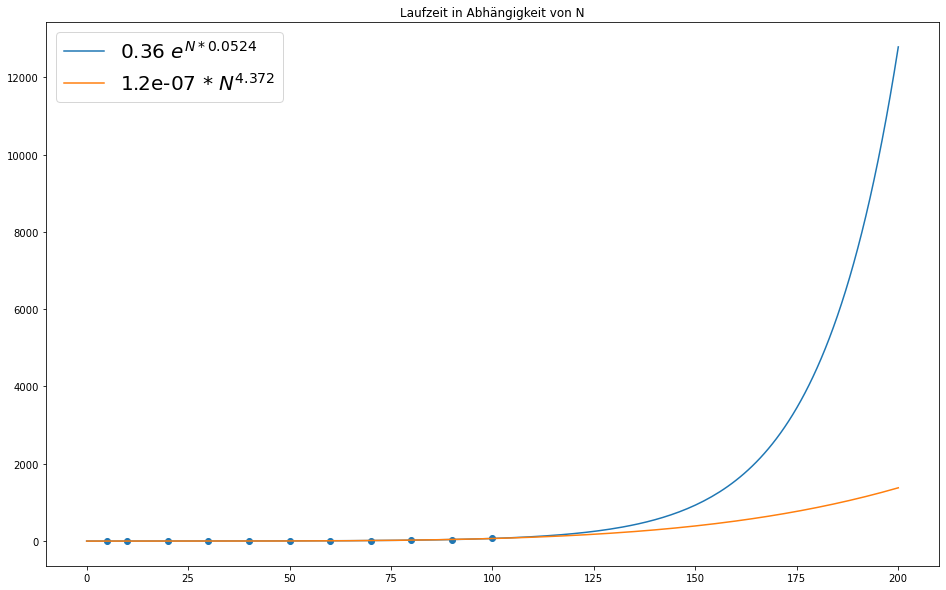

In [6]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Laufzeit in Abhängigkeit von N')
ax.scatter(ns_b, mean_total_lp_b)

# fitten
popt_exp, pcov_exp = curve_fit(f_exp, ns_b, mean_total_lp_b, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
# popt_exp
popt_poly, pcov_poly = curve_fit(f_poly, ns_b, mean_total_lp_b, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))


ax.plot(np.arange(201), f_exp(np.arange(201), *popt_exp), label=f"{popt_exp[0]:.3} $e^{{N*{popt_exp[1]:.3}}}$")
ax.plot(np.arange(201), f_poly(np.arange(201), *popt_poly), label=f"{popt_poly[0]:.3} * $N^{{{popt_poly[1]:.3f}}}$")

ax.legend(fontsize=20)

Das sind Fits für N=5 bis N=100. Ich habe jetzt noch einmal ein paar Simulationen für N=200 gemacht. Ich erwarte vom polyfit:

In [12]:
f_poly(200, *popt_poly)

1378.6458883223638

und vom exp-Fit:

In [13]:
f_exp(200, *popt_exp)

12784.459566879585

Tatsächlich kommt raus:

In [8]:
res200 = auswertung_ma.read_tracking_files(r'D:\Uni\Masterarbeit\Daten\Tree_billig\TreeTest_LP200_nodes_5_scenarios\TreePlusP_0.000000_p_200_nodes_5_RandomScenarioCreator_GVBilligFirstCreator_0.00_10.00_0.00_1.00', read_opt=True)
res200.mean()['total_lp[s]']

4321.560055555554

Jetzt fitte ich nochmal, diesmal mit extra Wert bei 200:

(-2.0, 50.0)

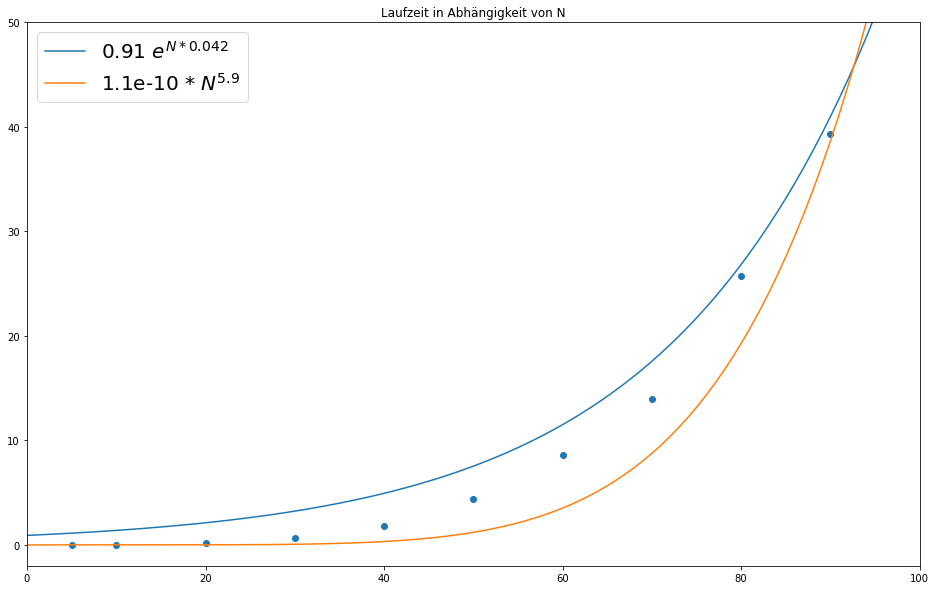

In [10]:
ns_b2 = ns_b[:]
ns_b2.append(200)
mean_total_lp_b2 = mean_total_lp_b[:]
mean_total_lp_b2.append(res200.mean()['total_lp[s]'])

fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Laufzeit in Abhängigkeit von N')
ax.scatter(ns_b2, mean_total_lp_b2)

# fitten
popt_exp, pcov_exp = curve_fit(f_exp, ns_b2, mean_total_lp_b2, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
# popt_exp
popt_poly, pcov_poly = curve_fit(f_poly, ns_b2, mean_total_lp_b2, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))


ax.plot(np.arange(201), f_exp(np.arange(201), *popt_exp), label=f"{popt_exp[0]:.2} $e^{{N*{popt_exp[1]:.2}}}$")
ax.plot(np.arange(201), f_poly(np.arange(201), *popt_poly), label=f"{popt_poly[0]:.2} * $N^{{{popt_poly[1]:.2}}}$")

ax.legend(fontsize=20)

ax.set_xlim([0,100])
ax.set_ylim([-2,50])

# Auswertung:
Irgendwie ist sind die Fits komisch, der Vorfaktor vom poly-Fit wird immer kleiner und der Faktor im Exponent bei der exp. Fkt auch. Außerdem sind beide Fits nicht gut im Bereich von kleinen N (bis 80)

## Hier schau ich mir noch ein paar andere Werte an (wie lange braucht opt, wie viele Constraints, etc.)

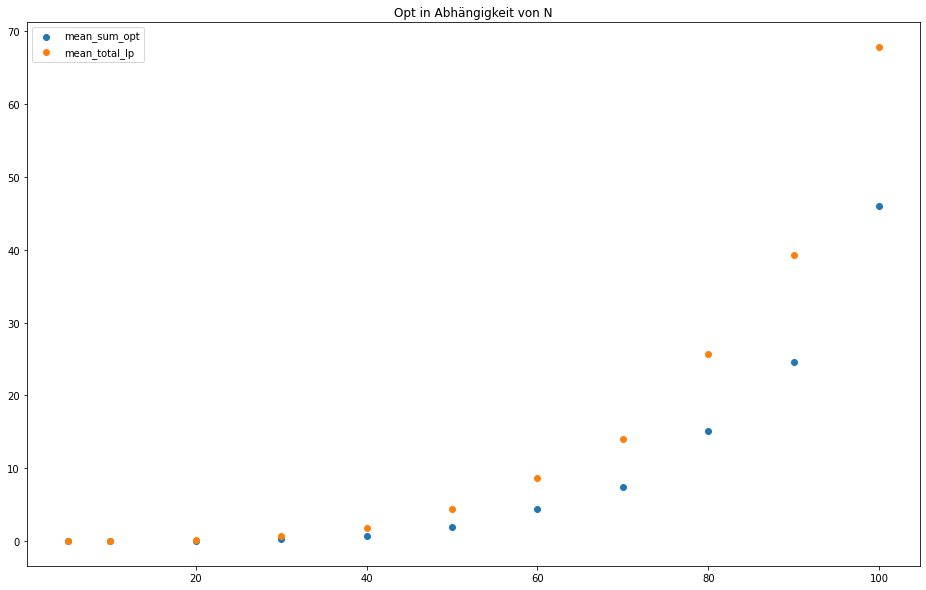

In [21]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Opt in Abhängigkeit von N')
ax.scatter(ns, mean_sum_opt, label='mean_sum_opt')
ax.scatter(ns, mean_total_lp, label='mean_total_lp')
ax.legend()

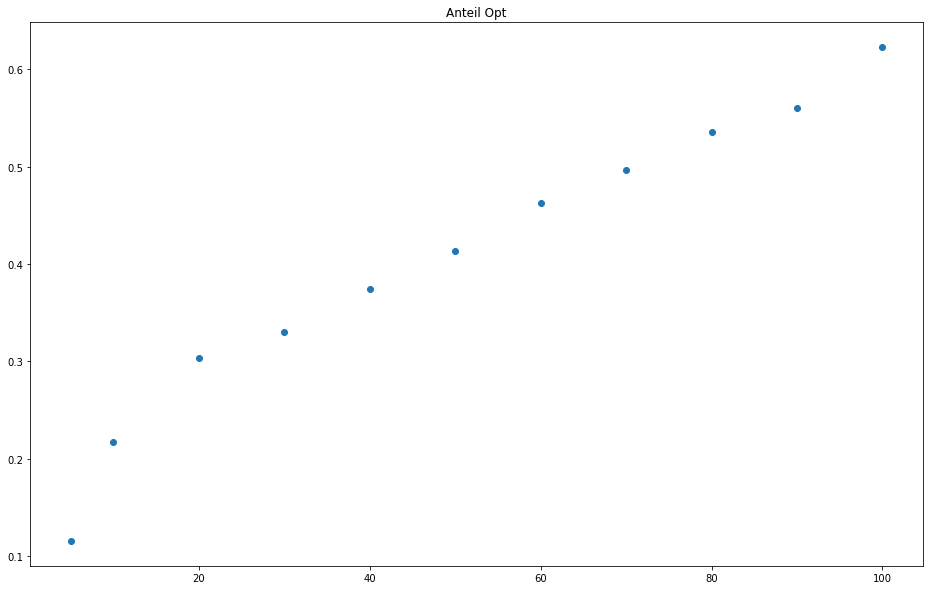

In [23]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Anteil Opt')
ax.scatter(ns, mean_anteil_opt)

[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[28.57, 90.83, 315.32, 610.07, 1022.4, 1537.66, 2156.28, 2872.58, 3769.71, 4603.37, 5870.58]


(-5.0, 110.0)

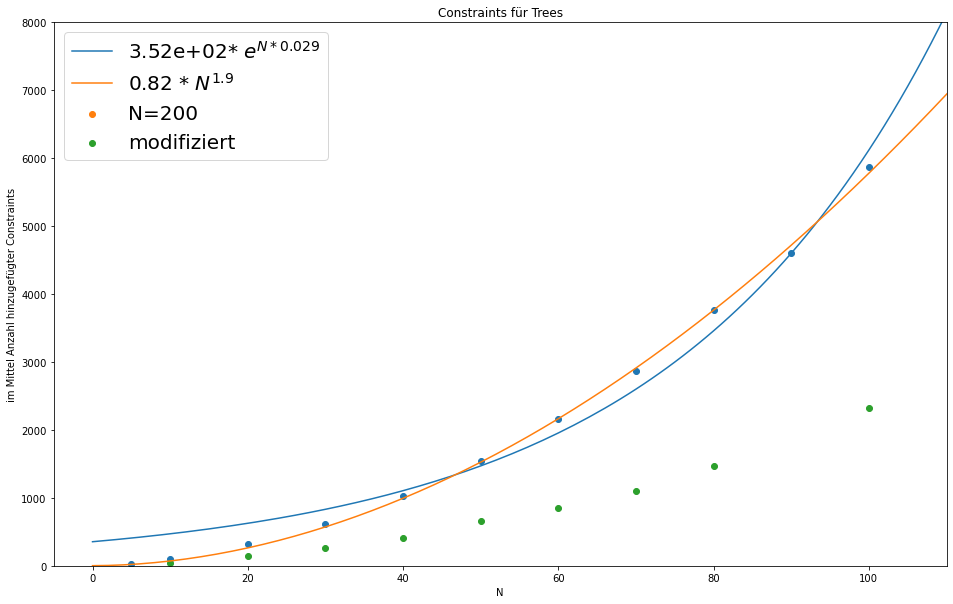

In [29]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_b, mean_lp_constrs_b)

# fitten
popt_exp, pcov_exp = curve_fit(f_exp, ns_b, mean_lp_constrs_b, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))

popt_poly, pcov_poly = curve_fit(f_poly, ns_b, mean_lp_constrs_b, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))


ax.plot(np.arange(201), f_exp(np.arange(201), *popt_exp), label=f"{popt_exp[0]:.3}* $e^{{N*{popt_exp[1]:.2}}}$")
ax.plot(np.arange(201), f_poly(np.arange(201), *popt_poly), label=f"{popt_poly[0]:.2} * $N^{{{popt_poly[1]:.2}}}$")

ax.set_title('Constraints für Trees')
ax.set_xlabel('N')
ax.set_ylabel('im Mittel Anzahl hinzugefügter Constraints')

ax.scatter(200, res200.mean().lp_constraint_counter, label='N=200')


# plotte noch die Daten vom mod. LPAlg
ax.scatter(ns_mod, mean_lp_constrs_mod, label='modifiziert')


ax.legend(fontsize=20)
# ax.set_yscale('log')
# ax.set_xscale('log')
print(ns_b)
print(mean_lp_constrs_b)

ax.set_ylim([-2,8000])
ax.set_xlim([-5, 110])

##### Auswertung:
Bisher sieht es so aus, als würde die Laufzeit exponentiell skalieren, aber die Anzahl an hinzugefügten constraints polynomial, kann ich vllt. darin noch einen Übergang sehen? Korrektur: eher sind beide polynomial

Ich predicte, dass ein LP-Alg für 200 Knoten im Mittel 12000s braucht und 22000 contraints hinzugefuegt werden

Dass mit den 12000s wurde nicht bestätigt (siehe oben), das mit den Constraints passt auch nicht so ganz, aber hier viel eindeutiger als der exp-Fit vorhersagt:

In [27]:
res200.mean().lp_constraint_counter

29964.666666666668

# Jetzt das ganze mit Tree, wo die 1. stage Kosten nur noch im Mittel billiger als 2. stage Kosten sind
Das habe ich hier ueberprueft, da stimmen die erzeugten Szenarien:

In [2]:
p_probs = r"D:\Uni\Masterarbeit\Daten\Tree_billig\Problems"
probs, scens = auswertung_ma.read_problems(p_probs)

In [16]:
i = 9
(scens[i]['first_stage_costs'] <= scens[i]['EV']).all()
# Es passt, es sind immer alle 1. stage Kosten kleiner als der 2. stage EV

True

## Das teste ich jetzt nochmal fuer den ersten Fall:

In [28]:
p_probs_bfc = r"D:\Uni\Masterarbeit\Daten\Tree_billig\Problems_BFC_20_nodes_5_scenarios\TreePlusC_2.000000_c_20_nodes_5_RandomScenarioCreator_GVBilligFirstCreator_0.00_10.00_0.00_1.00\simulation_0\Problems"
probs, scens = auswertung_ma.read_problems(p_probs_bfc)

In [31]:
bool_l = [(s['first_stage_costs'] <= s['EV']).all() for s in scens]
all(bool_l)

True

Ich vergleche jetzt nicht jedes Szenario, aber es auch hier ist so, dass gilt, dass die 1. stage Kosten einer Kante immer billiger sind, als ihr 2. stage Erwartungswert. Ein Unterschied, den ich sehen kann ist, dass der mittlere Abstand zwischen  1. stage Kosten und 2. stage Ev kleiner ist.

# Außerdem mache ich das direkt noch für den bisherigen standard RandomTestCreator, wo es auch sein kann, dass in 2. stage Ev billiger ist, also 1. stage Cost

In [33]:
# lese die neuen Daten ein
tbm_dic = {}

dirs_tree_billig_mittel = [d for d in os.listdir(p) if 'TreeTest_LP2_' in d]

for ho in dirs_tree_billig_mittel:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p, ho, os.listdir(os.path.join(p,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    
    tbm_dic[number_nodes] = df.mean()

100
10
20
30
40
50
5
60
70
80
90


In [34]:
ns_bm = sorted(list(tbm_dic.keys()))
mean_lp_constrs_bm = [tbm_dic[n].lp_constraint_counter for n in ns_bm]
mean_total_lp_bm = [tbm_dic[n]['total_lp[s]'] for n in ns_bm]
mean_sum_opt_bm = [tbm_dic[n]['sum_opt[s]'] for n in ns_bm]
mean_anteil_opt_bm = [tbm_dic[n]['anteil_opt'] for n in ns_bm]

In [35]:
# lese die neuen Daten ein
tb3_dic = {}

dirs_tree3 = [d for d in os.listdir(p) if 'TreeTest_LP3_' in d]

for ho in dirs_tree3:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p, ho, os.listdir(os.path.join(p,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    
    tb3_dic[number_nodes] = df.mean()

100
10
20
30
40
50
5
60
70
80
90


In [36]:
ns_b3 = sorted(list(tb3_dic.keys()))
mean_lp_constrs_b3 = [tb3_dic[n].lp_constraint_counter for n in ns_b3]
mean_total_lp_b3 = [tb3_dic[n]['total_lp[s]'] for n in ns_b3]
mean_sum_opt_b3 = [tb3_dic[n]['sum_opt[s]'] for n in ns_b3]
mean_anteil_opt_b3 = [tb3_dic[n]['anteil_opt'] for n in ns_b3]

[1.52053640e-07 4.29250831e+00]


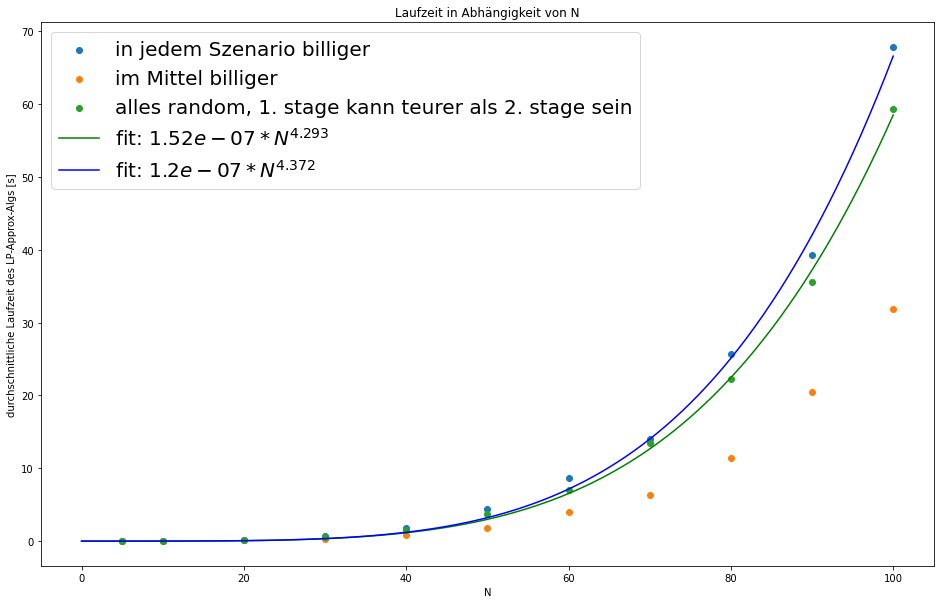

In [40]:
# plotte mal die Laufzeiten zusammen 
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Laufzeit in Abhängigkeit von N')
ax.scatter(ns_b, mean_total_lp_b, label='in jedem Szenario billiger')
ax.scatter(ns_bm, mean_total_lp_bm, label='im Mittel billiger')
ax.scatter(ns_b3, mean_total_lp_b3, label='alles random, 1. stage kann teurer als 2. stage sein')

# fitte die RTC(0,10) Werte
popt_poly, pcov_poly = curve_fit(f_poly, ns_b3, mean_total_lp_b3)
popt_polybfc, pcov_polybfc = curve_fit(f_poly, ns_b, mean_total_lp_b)

print(popt_poly)
ax.plot(np.arange(101), f_poly(np.arange(101), *popt_poly), c='green',label=f'fit: ${popt_poly[0]:.3} * N^{{{popt_poly[1]:.3f}}}$')
ax.plot(np.arange(101), f_poly(np.arange(101), *popt_polybfc), c='blue',label=f'fit: ${popt_polybfc[0]:.3} * N^{{{popt_polybfc[1]:.3f}}}$')

ax.set_xlabel('N')
ax.set_ylabel('durchschnittliche Laufzeit des LP-Approx-Algs [s]')
ax.legend(fontsize=20)
# ax.set_yscale('log')
# ax.set_xscale('log')

# Auswertung
- Es ist so, dass (zumindest so wie ich das mache) der LP-Alg am längsten braucht, wenn die 1. stage Kosten immer kleiner sind als die 2. stage Kosten (in jedem Szenario). Ein bisschen schneller wird es, wenn alle Kosten random sind, es also sein kann, dass der EV der 2. Stage einer Kante billiger als deren 1. stage Kosten ist. Am schnellsten geht es aber, wenn die 1. stage Kanten in der 1. stage kleiner als der EV der 2. stage sind. Wobei ich das aber nicht verstehe, weil das ist auch für den ersten Fall gegeben, also spielt da mit rein, wie sehr sich die Kantengewichte voneinander unterscheiden? (siehe dazu weiter oben, ich denke, der Abstand zwischen den Kantengewichten macht was aus)
- Hier hab ich wieder den selben Fit wie oben (blau) und zusätzlich noch in Grün die RTC(0,10) Kurve gefittet, zum Vergleich unten. Man sieht aber wieder, dass es komische Fit-Parameter gibt, anders bei der Anzahl an Constraints:

[1.0186732  1.85718049]


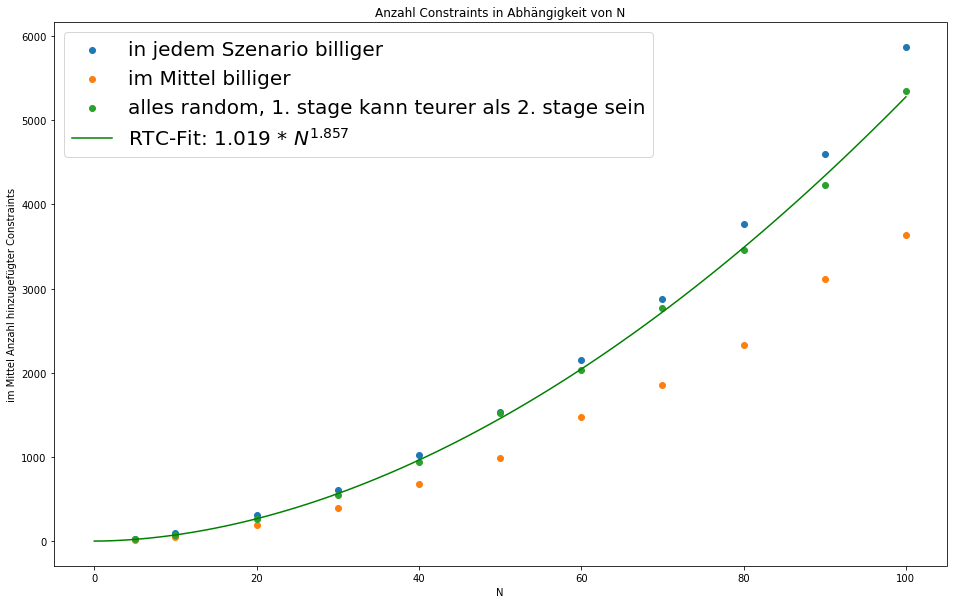

In [48]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Anzahl Constraints in Abhängigkeit von N')
ax.scatter(ns_b, mean_lp_constrs_b, label='in jedem Szenario billiger')
ax.scatter(ns_bm, mean_lp_constrs_bm, label='im Mittel billiger')
ax.scatter(ns_b3, mean_lp_constrs_b3, label='alles random, 1. stage kann teurer als 2. stage sein')

# fitte mal noch den randomtestcreator, weil ich den unten für mehr Kanten im Graph wieder verwende
popt_poly, pcov_poly = curve_fit(f_poly, ns_b3, mean_lp_constrs_b3)
ax.plot(np.arange(101), f_poly(np.arange(101), *popt_poly), c='green', label=f'RTC-Fit: {popt_poly[0]:.3f} * $N^{{{popt_poly[1]:.3f}}}$')
ax.legend(fontsize=20)
ax.set_xlabel('N')
ax.set_ylabel('im Mittel Anzahl hinzugefügter Constraints')
print(popt_poly)

## jetzt überprüfen, ob der LP-Approx-Alg generell polynomial skaliert (in Bezug auf Constraintzahl)
dazu untersuche ich ihn für ein p>0 (nutze hier jetzt aber TreePlusC) und zwar für mehrere N, oder halt, eigentlich skaliert das ja mit der Kantenanzahl oder?
ich hab dazu auch schon Daten (siehe skalierung_lp)

In [88]:
n=60
c=3
print(calc_p_to_c(n, c))
calc_expected_edges_p(n, calc_p_to_c(n, c))

0.017241379310344827


88.5

In [118]:
p_c3 = r"D:\Uni\Masterarbeit\Daten\LP_Approx_skalierung"
# lese die neuen Daten ein
dic3 = {}

dirs_tree3 = [d for d in os.listdir(p_c3) if 'TreeTest_C_' in d]

for ho in dirs_tree3:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p_c3, ho, os.listdir(os.path.join(p_c3,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    
    dic3[number_nodes] = df.mean()

ns_c3 = sorted(list(dic3.keys()))
mean_lp_constrs_c3 = [dic3[n].lp_constraint_counter for n in ns_c3]
mean_total_lp_c3 = [dic3[n]['total_lp[s]'] for n in ns_c3]
mean_sum_opt_c3 = [dic3[n]['sum_opt[s]'] for n in ns_c3]
mean_anteil_opt_c3 = [dic3[n]['anteil_opt'] for n in ns_c3]

100
10
120
20
30
40
50
5
60
70
80
90


In [150]:
# lese den Wert von N=120separat ein
dfc3_120 = auswertung_ma.read_tracking_files(r"D:\Uni\Masterarbeit\Daten\LP_Approx_skalierung\TreeTest_C_120_nodes_5_scenarios\TreePlusC_3.000000_c_120_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000", read_opt=True)
dfc3_120.mean()

approx_teil[s]              0.000000
lp_constraint_counter    5585.450000
lp_teil_loop[s]           223.580000
lp_teil_setup[s]            0.000000
sum_opt[s]                175.684081
total_lp[s]               224.041988
dtype: float64

[0.09897238 0.07132107]


Text(0, 0.5, 'Laufzeit[s]')

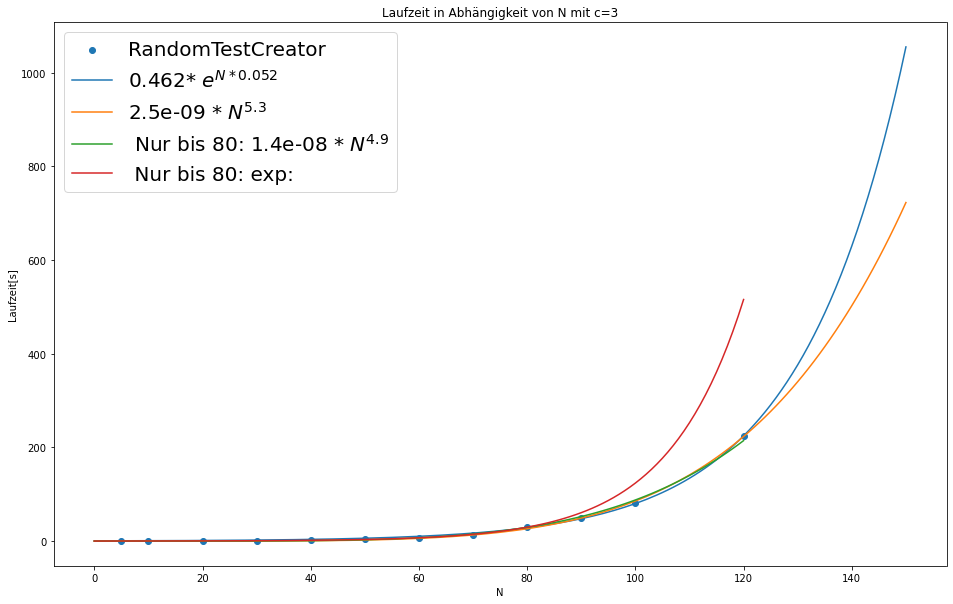

In [119]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Laufzeit in Abhängigkeit von N mit c=3')
ax.scatter(ns_c3, mean_total_lp_c3, label='RandomTestCreator')

popt_exp, pcov_exp = curve_fit(f_exp, ns_c3, mean_total_lp_c3, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
popt_poly, pcov_poly = curve_fit(f_poly, ns_c3, mean_total_lp_c3, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))

popt_exp_bis_80, pcov_exp_bis_80 = curve_fit(f_exp, ns_c3[:9], mean_total_lp_c3[:9], maxfev=50000, p0=[0,0])
popt_poly_bis_80, pcov_poly_bis_80 = curve_fit(f_poly, ns_c3[:9], mean_total_lp_c3[:9], maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
print(popt_exp_bis_80)

ax.plot(np.arange(151), f_exp(np.arange(151), *popt_exp), label=f"{popt_exp[0]:.3}* $e^{{N*{popt_exp[1]:.2}}}$")
ax.plot(np.arange(151), f_poly(np.arange(151), *popt_poly), label=f"{popt_poly[0]:.2} * $N^{{{popt_poly[1]:.2}}}$")

ax.plot(np.arange(121), f_poly(np.arange(121), *popt_poly_bis_80), label=f" Nur bis 80: {popt_poly_bis_80[0]:.2} * $N^{{{popt_poly_bis_80[1]:.2}}}$")
ax.plot(np.arange(121), f_exp(np.arange(121), *popt_exp_bis_80), label=f" Nur bis 80: exp: ")

ax.legend(fontsize=20)
ax.set_xlabel('N')
ax.set_ylabel('Laufzeit[s]')
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([-5,40])

# Auswertung:
Wenn ich nur die Werte bis N=80 nehme und damit vorhersagen will, wie die Laufzeit für 90 und 100 aussieht, dann liefert der polynomiale Fit ganz klar die korrektere Vorhersage, auch wenn sich der exponential-Fit an die gegebenen Daten auch gut anpasst.
Ich mach nochmal eine Simulation mit 120 Knoten und prohezeie mit poly-fit (an die Werte bis n=100) ca 194s und mit exp-fit 254s Durchschnittslaufzeit

Es kommt genau die Mitte bei raus.. 224s

Wenn ich nur die Werte bis 80 benutze und damit für N=120 prohezeie, sagt mir der Poly-Fit 214.5 und der exp-Fit 515 voraus. Da ist also der poly-Fit exakter


### Siehe oben, das ist diese komische Mischskalierung

Ich denke, dass es eher polynomial skaliert, aber es lässt sich eben auch eine Exponentialfkt. dran fitten..

Es ist ja auch immernoch so, dass wenn ich zufälligerweise mal eine Problemstellung mit deutlich mehr Kanten erzeuge, als es im durchschnitt sind, dann dauert diese Simulation überdurchschnittlich länger, denke ich, zumindest ist das beim optimalen Algorithmus so. Vielleicht ist das dann hier auch so. Allerdings gilt das auch für alle N, also auch für die niedrigen 

[1.28131269 1.73407505]
[0.77414738 1.85232607]


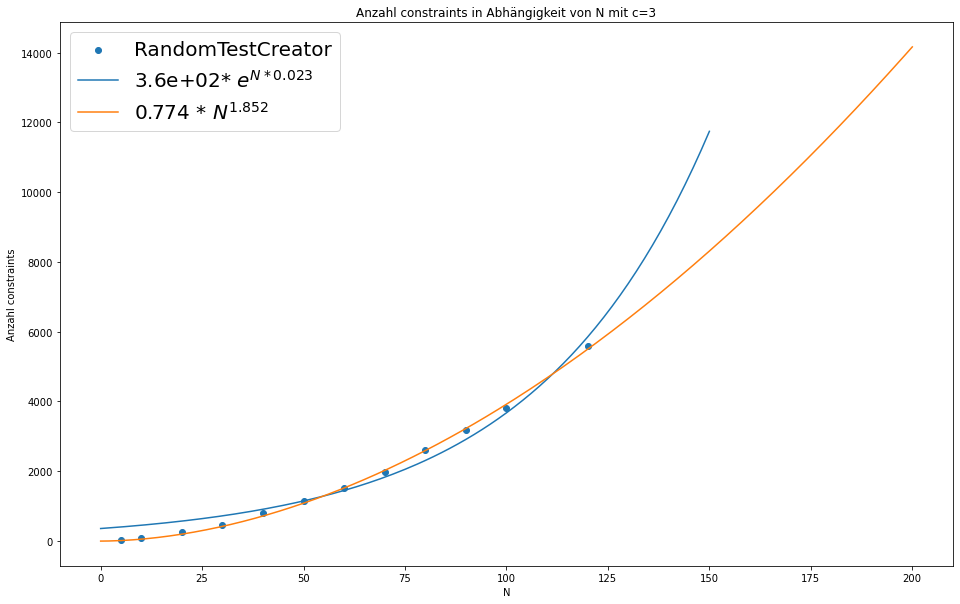

In [70]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Anzahl constraints in Abhängigkeit von N mit c=3')
ax.scatter(ns_c3, mean_lp_constrs_c3, label='RandomTestCreator')

popt_exp, pcov_exp = curve_fit(f_exp, ns_c3, mean_lp_constrs_c3, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
popt_poly, pcov_poly = curve_fit(f_poly, ns_c3, mean_lp_constrs_c3, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))

popt_exp_bis_80, pcov_exp_bis_80 = curve_fit(f_exp, ns_c3[:9], mean_lp_constrs_c3[:9], maxfev=50000, p0=[0,0])
popt_poly_bis_80, pcov_poly_bis_80 = curve_fit(f_poly, ns_c3[:9], mean_lp_constrs_c3[:9], maxfev=50000, p0=[0,0])

ax.plot(np.arange(151), f_exp(np.arange(151), *popt_exp), label=f"{popt_exp[0]:.3}* $e^{{N*{popt_exp[1]:.2}}}$")
ax.plot(np.arange(201), f_poly(np.arange(201), *popt_poly), label=f"{popt_poly[0]:.3f} * $N^{{{popt_poly[1]:.3f}}}$")

ax.legend(fontsize=20)
ax.set_xlabel('N')
ax.set_ylabel('Anzahl constraints')
# ax.set_yscale('log')
# ax.set_xscale('log')
print(popt_poly_bis_80)
print(popt_poly)

# Auswertung
Hier ist die Skalierung ganz klar polynomial. Da hat sich auch im Fit nicht viel an den Parametern getan. Die Constrainanzahl skaliert mit $N^{1.852}$, oben waren es 1.857 (bei c=2, oder dazu äquivalent p=0, also Tree). Das ist sehr nah beieinandern, aber sogar noch etwas weniger geworden. 

Der Vorfaktor ist hier aber kleiner. Ich brauche also weniger Constraints, aber die Skalierung ist fast gleich
Ich kann also hier erstmal nichts sagen wie, beim trivialsten Problem müssen weniger Constraints konstruiert werden.

Es ist jetzt so, dass ich, obwohl ich mehr Kanten in der Problemstellung habe eine ähnliche Abhängigkeit der Anzahl an Constraints habe, wie bei Trees zu den verschiedenen N.

In [97]:
popt_poly_alt_constr

array([1.28131269, 1.73407505])

In [89]:
mean_lp_constrs_c3

[26.88, 81.02, 261.01, 469.98, 801.71, 1137.9, 1514.64, 1966.34, 2613.42]

# Auswertung
Man sieht wieder, dass weniger constraints benötigt werden, wenn ein paar Kanten dazu kommen und kein Tree mehr untersucht wird. Warum das passiert, verstehe ich nicht. Was passiert, denn im Algorithmus: Ich finde anscheinend schneller einen minimalen Cut, welcher die Bedingung erfüllt, dass $\sum x_e^0 + x_e^i \ge 1$ erfüllt. Was folgt daraus, dass es mehr Kanten gibt?

# Jetzt nochmal für c=4

In [71]:
p_c3 = r"D:\Uni\Masterarbeit\Daten\LP_Approx_skalierung"
# lese die neuen Daten ein
dic4 = {}

dirs_tree4 = [d for d in os.listdir(p_c3) if 'TreeTest_C4_' in d]

for ho in dirs_tree4:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p_c3, ho, os.listdir(os.path.join(p_c3,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    
    dic4[number_nodes] = df.mean()

ns_c4 = sorted(list(dic4.keys()))
mean_lp_constrs_c4 = [dic4[n].lp_constraint_counter for n in ns_c4]
mean_total_lp_c4 = [dic4[n]['total_lp[s]'] for n in ns_c4]
mean_sum_opt_c4 = [dic4[n]['sum_opt[s]'] for n in ns_c4]
mean_anteil_opt_c4 = [dic4[n]['anteil_opt'] for n in ns_c4]

10
20
30
40
50
60
70
80


Text(0, 0.5, 'Laufzeit[s]')

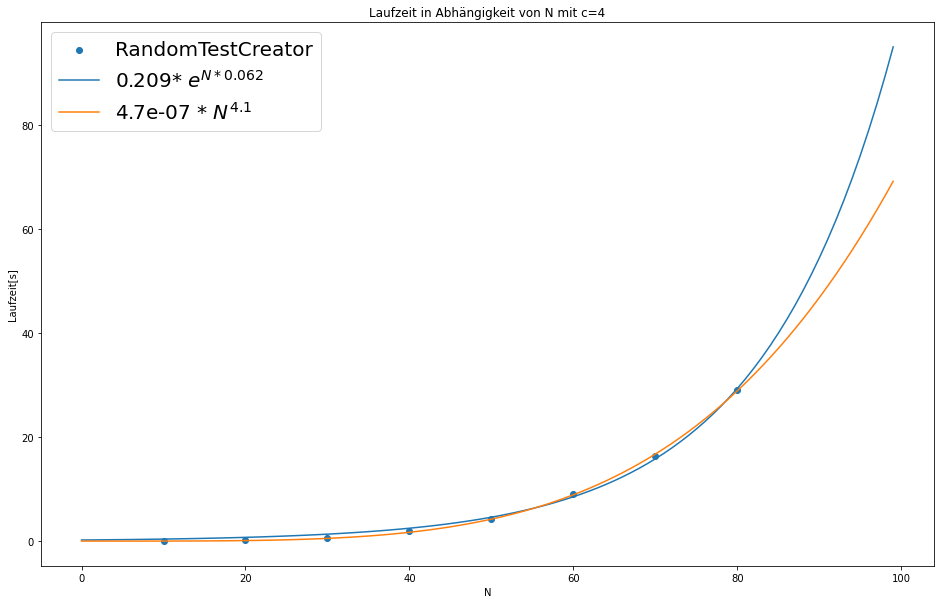

In [72]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Laufzeit in Abhängigkeit von N mit c=4')
ax.scatter(ns_c4, mean_total_lp_c4, label='RandomTestCreator')

popt_exp, pcov_exp = curve_fit(f_exp, ns_c4, mean_total_lp_c4, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
popt_poly, pcov_poly = curve_fit(f_poly, ns_c4, mean_total_lp_c4, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))

ax.plot(np.arange(100), f_exp(np.arange(100), *popt_exp), label=f"{popt_exp[0]:.3}* $e^{{N*{popt_exp[1]:.2}}}$")
ax.plot(np.arange(100), f_poly(np.arange(100), *popt_poly), label=f"{popt_poly[0]:.2} * $N^{{{popt_poly[1]:.2}}}$")

ax.legend(fontsize=20)
ax.set_xlabel('N')
ax.set_ylabel('Laufzeit[s]')
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_xlim([0,80])
# ax.set_ylim([-5,20])

# Auswertung:
selbes Problem. skaliert komisch

## jetzt constraints:

Text(0, 0.5, 'Anzahl constraints')

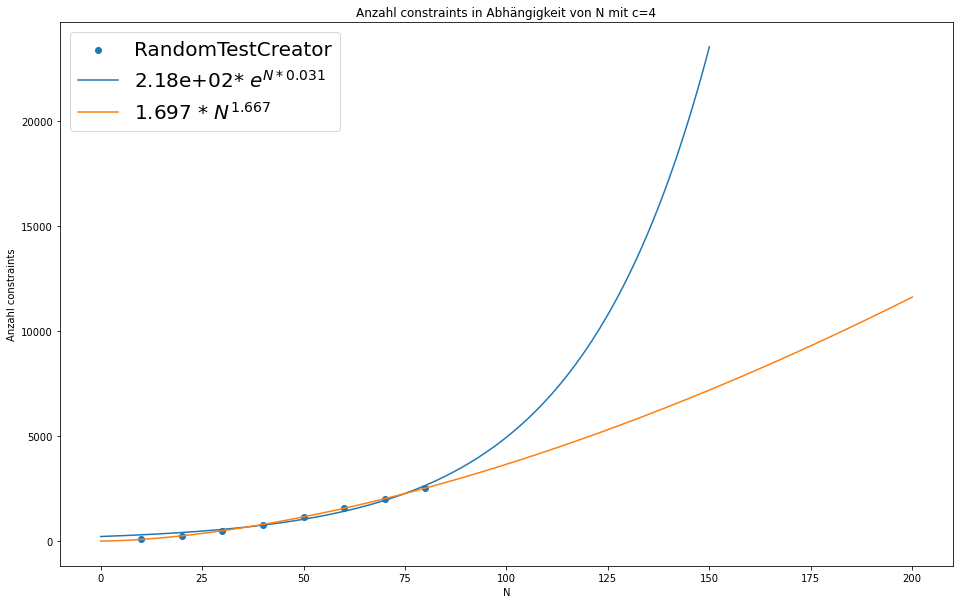

In [74]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Anzahl constraints in Abhängigkeit von N mit c=4')
ax.scatter(ns_c4, mean_lp_constrs_c4, label='RandomTestCreator')

popt_exp, pcov_exp = curve_fit(f_exp, ns_c4, mean_lp_constrs_c4, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
popt_poly, pcov_poly = curve_fit(f_poly, ns_c4, mean_lp_constrs_c4, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))

ax.plot(np.arange(151), f_exp(np.arange(151), *popt_exp), label=f"{popt_exp[0]:.3}* $e^{{N*{popt_exp[1]:.2}}}$")
ax.plot(np.arange(201), f_poly(np.arange(201), *popt_poly), label=f"{popt_poly[0]:.3f} * $N^{{{popt_poly[1]:.3f}}}$")

ax.legend(fontsize=20)
ax.set_xlabel('N')
ax.set_ylabel('Anzahl constraints')
# ax.set_yscale('log')
# ax.set_xscale('log')
# print(popt_poly_bis_80)
# print(popt_poly)

In [75]:
# predicte fuer n=90
f_poly(90, *popt_poly)

3068.700792540946

In [76]:
# predicte fuer n=100
f_poly(100, *popt_poly)

3657.8176103196797

# nochmal fuer c=5

In [114]:
def read_lp_results(source):
    """_summary_

    Args:
        source (_type_): path zu der lp_results Datei

    Returns:
        _type_: Anteil aller LP-Variablen, die ganzzahlig sind
    """
    mInFile = open(source, mode='r')
    fileString = mInFile.read()
    mInFile.close()
    if '@arcs' in fileString:
        initKey = '@arcs'
        initPos = 6
    elif '@edges' in fileString:
        initKey = '@edges'
        initPos = 7
    else:
        print('No keyword \'@arcs\' or \'@edges\' found\n Wrong file format')
        return

    # versuche, die relevanten Daten als np_array aus zwischengespeichertem tmp.txt-File einzulesen
    try:
        with open('tmp.txt', 'w') as tmp:
            tmp.write(fileString[fileString.find(initKey)+initPos:].split("\n", 1)[1])
        
        arr = np.loadtxt('tmp.txt')
        os.remove('tmp.txt')
    except:
        # falls es einen Fehler gegeben hat
        print('ROBERTERROR: Es gab einen Fehler beim Erzeugen des np-Arrays!')
        
        try:
            os.remove('tmp.txt')
        except FileNotFoundError:
            print('ROBERTERRor: Die tmp.txt Datei war bereits gelöscht!')
    
    # nimm von dem array nur den Teil in dem die LP-Variablen drin stehen und checke, wie viele davon integer sind
    at = arr[:, 3:]
#     print(at)
#     print((at[np.mod(at, 1)>0]).size)
#     print(at.shape)
    return (at[np.mod(at, 1)>0]).size / at.size

In [78]:
pt = r"D:\Uni\Masterarbeit\Daten\3.txt"

In [115]:
read_lp_results(pt)

0.04524886877828054

In [116]:
60/ (221 * 6)

0.04524886877828054